## MODELAGEM DE DISPERSÃO

In [2]:
# Função para determinar a classe de estabilidade de Pasquill
def determinarClasseEstabilidade(velocidade_vento, insolar_solar=None, cobertura_nuvens=None, periodo='dia'):
    if periodo == 'dia':
        if insolar_solar not in ['alta', 'moderada', 'baixa']:
            raise ValueError("insolar_solar deve ser 'alta', 'moderada' ou 'baixa' durante o dia.")
        
        if insolar_solar == 'alta':
            if velocidade_vento < 2:
                return 'A'
            elif 2 <= velocidade_vento < 3:
                return 'B'
            elif 3 <= velocidade_vento < 5:
                return 'C'
            else:
                return 'D'
        elif insolar_solar == 'moderada':
            if velocidade_vento < 2:
                return 'B'
            elif 2 <= velocidade_vento < 3:
                return 'B'
            elif 3 <= velocidade_vento < 5:
                return 'C'
            else:
                return 'D'
        elif insolar_solar == 'baixa':
            if velocidade_vento < 2:
                return 'C'
            elif 2 <= velocidade_vento < 3:
                return 'C'
            elif 3 <= velocidade_vento < 5:
                return 'D'
            else:
                return 'D'
    
    elif periodo == 'noite':
        if cobertura_nuvens not in ['claro', 'parcialmente_nublado', 'nublado']:
            raise ValueError("cobertura_nuvens deve ser 'claro', 'parcialmente_nublado' ou 'nublado' durante a noite.")
        
        if cobertura_nuvens == 'claro':
            if velocidade_vento < 2:
                return 'F'
            elif 2 <= velocidade_vento < 3:
                return 'E'
            elif 3 <= velocidade_vento < 5:
                return 'D'
            else:
                return 'D'
        elif cobertura_nuvens == 'parcialmente_nublado':
            if velocidade_vento < 2:
                return 'E'
            elif 2 <= velocidade_vento < 3:
                return 'D'
            elif 3 <= velocidade_vento < 5:
                return 'D'
            else:
                return 'D'
        elif cobertura_nuvens == 'nublado':
            if velocidade_vento < 2:
                return 'D'
            elif 2 <= velocidade_vento < 3:
                return 'D'
            elif 3 <= velocidade_vento < 5:
                return 'D'
            else:
                return 'D'
    
    else:
        raise ValueError("Período deve ser 'dia' ou 'noite'.")

In [3]:
def sigmaXY(x, classe, urbOrRural):
    if urbOrRural == 'urbano':
        if classe == 'A' or classe == 'B':
            sigmaY = 0.32 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.24 * x * (1 + 0.001 * x) ** 0.5
        elif classe == 'C':
            sigmaY = 0.22 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.20 * x * (1 + 0.001 * x) ** 0.5
        elif classe == 'D':
            sigmaY = 0.16 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.14 * x * (1 + 0.0003 * x) ** (-0.5)
        elif classe == 'E' or classe == 'F':
            sigmaY = 0.11 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.001 * x) ** (-0.5)
        else:
            raise ValueError('Classe de estabilidade errada')
    elif urbOrRural == 'rural':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.12 * x
        elif classe == 'C':
            sigmaY = 0.11 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0001 * x) ** (-0.5)
        elif classe == 'D':
            sigmaY = 0.08 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.06 * x * (1 + 0.0001 * x) ** (-0.5)
        elif classe == 'E':
            sigmaY = 0.06 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.03 * x * (1 + 0.0003 * x) ** (-1)
        elif classe == 'F':
            sigmaY = 0.04 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.016 * x * (1 + 0.0003 * x) ** (-1)
        else:
            raise ValueError('Classe de estabilidade errada')
    else:
        raise ValueError('Tipo de área inválido')

     # Garantir que sigmaY e sigmaZ não sejam zero para evitar divisões por zero
    sigmaY = np.maximum(sigmaY, 0.001)
    sigmaZ = np.maximum(sigmaZ, 0.001)

    
    return sigmaY, sigmaZ
   



In [4]:
import numpy as np

# Função para estimar o deltaH com base na equação de Davidson-Bryant
def deltaHdavidsonBryant(d, vs, u, Ts, Tamb):
    deltaH = (d * (vs / u)**(1.4)) * (1 + (Ts - Tamb) / Ts)
    return deltaH



In [5]:
# Criando uma função do modelo gaussiano

def modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H):
    termo1 = qs / (2 * np.pi * sigmaY * sigmaZ * u)
    termo2 = np.exp((-y**2) / (2 * sigmaY**2))
    termo3 = np.exp((-(z - H)**2) / (2 * sigmaZ**2)) + np.exp((-(z + H)**2) / (2 * sigmaZ**2))
    conc = termo1 * termo2 * termo3
    conc = conc * 10**6  # Convertendo para microgramas por metro cúbico
    return conc

In [6]:

# Utilizando a função do modelo gaussiano
x = 1000  # distância maior para verificar a dispersão em uma área considerável
classe = 'A'
urbOrRural = 'urbano'
qs = 100  # g/s
u = 10  # m/s
y = 0  # estimando na direção do vento
z = 1.5  # altura do nariz
H = 50  # m

# Calculando sigmaY e sigmaZ
sigmaY, sigmaZ = sigmaXY(x, classe, urbOrRural)

# Imprimindo os valores intermediários para verificação
print("sigmaY = {:.6f}, sigmaZ = {:.6f}".format(sigmaY, sigmaZ))

# Chamando a função do modelo gaussiano
conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H)

print("A concentração estimada é = {:.2f} μg/m³".format(conc))


sigmaY = 270.449362, sigmaZ = 339.411255
A concentração estimada é = 34.30 μg/m³


deltaH = 2.700592857381857
A pluma subiu


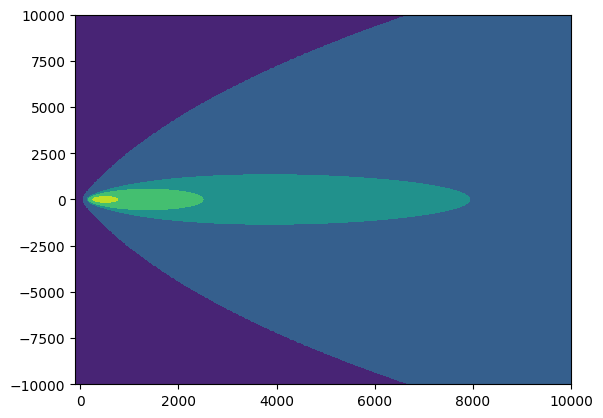

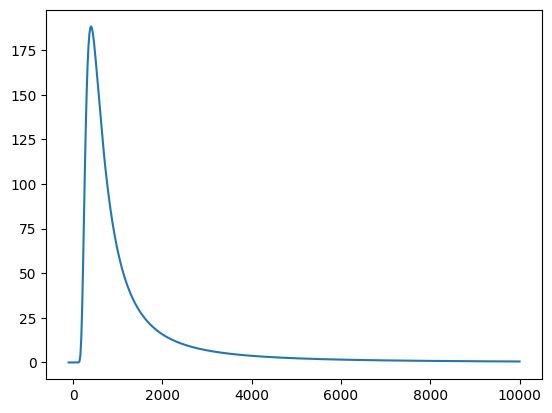

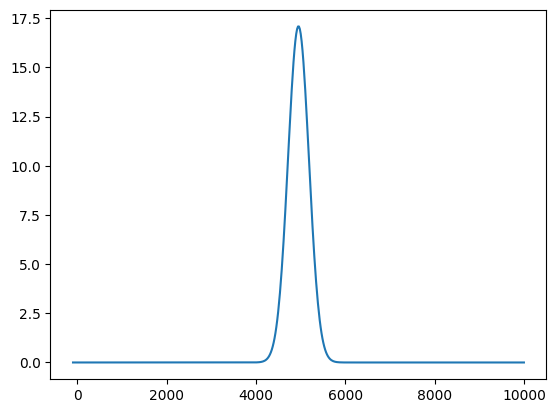

In [7]:
# Criando domínio de modelagem 
x = np.linspace(-100,10000,500)
#print(x)
y = np.linspace(-10000,10000,500)

# Criando matrizes de x e y
xx,yy = np.meshgrid(x,y)
#print(xx.shape)


# Adotando inputs
classe = 'A'
urbOrRural = 'urbano' 
hg = 150 # m altura geométrica da chaminé
qs = 100 # g/s
u = 5 # m/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
d = 1 # em metros
vs = 10 # em m/s
Ts = 300 # em Kelvin
Tamb = 293 # em Kelvin

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY,sigmaZ = sigmaXY(xx,classe,urbOrRural)
#print(sigmaY)

if vs>1.5*u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH = deltaHdavidsonBryant(d,vs,u,Ts,Tamb)
    print('deltaH = '+str(deltaH))
    hef = hg+deltaH
    print('A pluma subiu')
else:
    hef = hg +2*d*((vs/u)-1.5)
    print('A pluma caiu')

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY, sigmaZ,u,yy,z,hef)

# Visualização dos resultados no espaço
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig,ax = plt.subplots()
ax.contourf(xx,yy,conc+0.1,norm = LogNorm())

# Corte em y - sobre o eixo x
fig,ax = plt.subplots()
ax.plot(x,conc[250,:])

# Corte em x - sobre o eixo y 
fig,ax = plt.subplots()
ax.plot(x,conc[:,100])

In [8]:
def holland_tipdownwash(d, vs, u, Ts, Tamb, hg):
   # Calcula a sobrelevação da pluma sem considerar o efeito Tip-Downwash
    deltaH =((vs*d)/u) * (1.5 + 2.68*(10**(-10))*1013.25*((Ts-Tamb)/Ts)*d)
    return deltaH

deltaH = 3.00000001267238
A pluma subiu


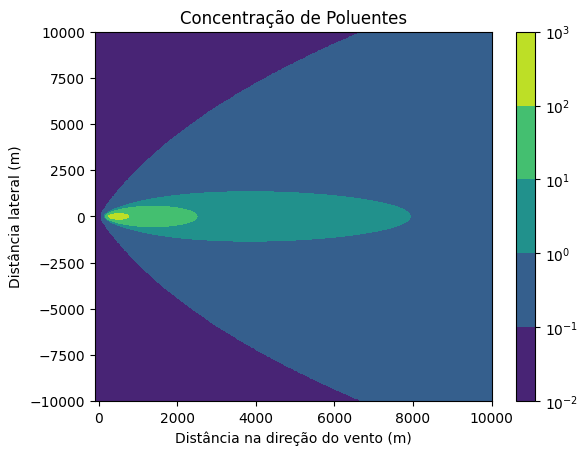

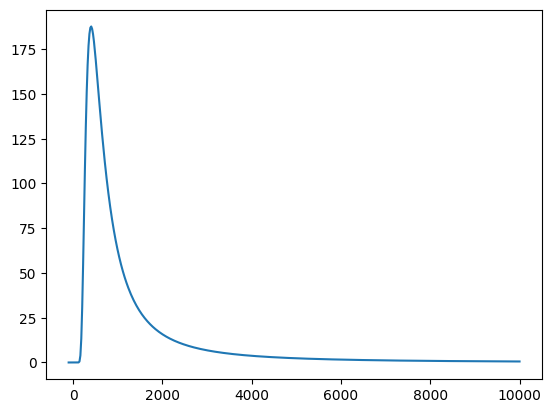

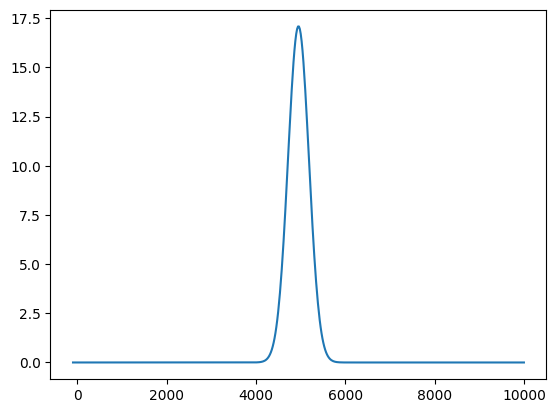

In [9]:



# Adotando inputs
classe = 'A'
urbOrRural = 'urbano' 
hg = 150 # m altura geométrica da chaminé
qs = 100 # g/s
sigmaY = 10 # m
sigmaZ = 15 # m
u = 5 # m/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
d = 1 # em metros
vs = 10 # em m/s
Ts = 300 # em Kelvin
Tamb = 293 # em Kelvin

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY,sigmaZ = sigmaXY(xx,classe,urbOrRural)
#print(sigmaY)

if vs>1.5*u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH =holland_tipdownwash(d, vs, u, Ts, Tamb, hg)
    print('deltaH = '+str(deltaH))
    h = hg+ deltaH
    print('A pluma subiu')
else:
    h = hg +2*d*((vs/u)-1.5)
    print('A pluma caiu')

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,yy,z,h)

# Visualização dos resultados no espaço
fig, ax = plt.subplots()
cf = ax.contourf(xx, yy, conc + 0.1, norm=LogNorm())
plt.colorbar(cf)
plt.title("Concentração de Poluentes")
plt.xlabel("Distância na direção do vento (m)")
plt.ylabel("Distância lateral (m)")
plt.show()


# Corte em y - sobre o eixo x
fig,ax = plt.subplots()
ax.plot(x,conc[250,:])

# Corte em x - sobre o eixo y 
fig,ax = plt.subplots()
ax.plot(x,conc[:,100])



Fonte: recovery_boiler, Poluente: MP


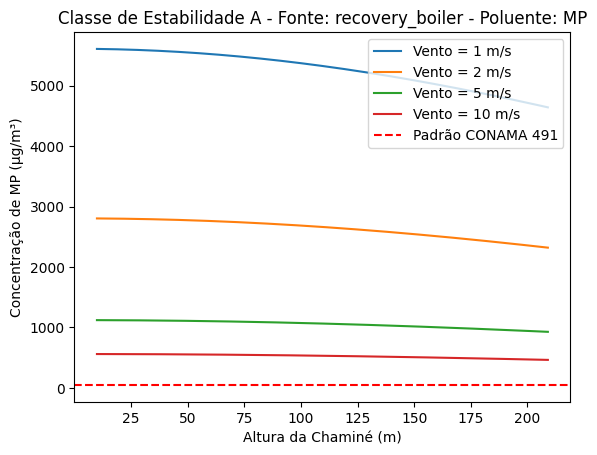

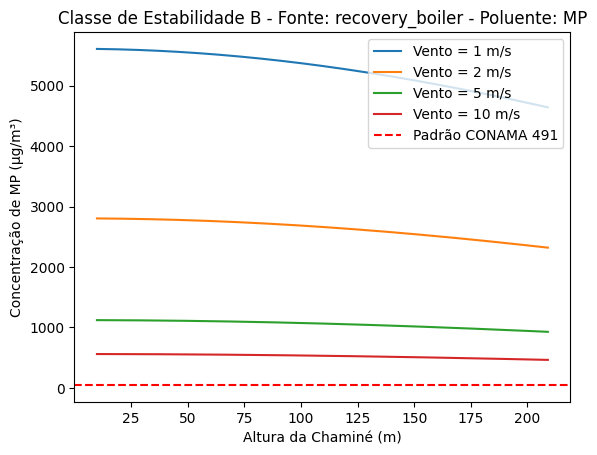

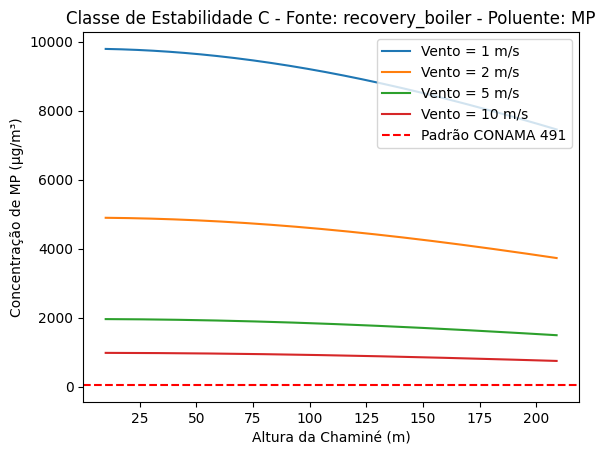

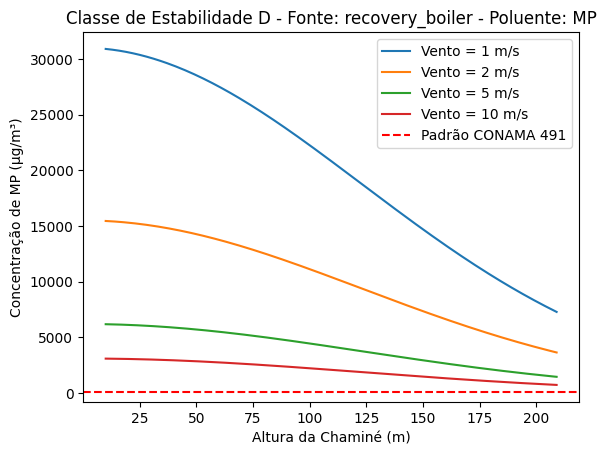

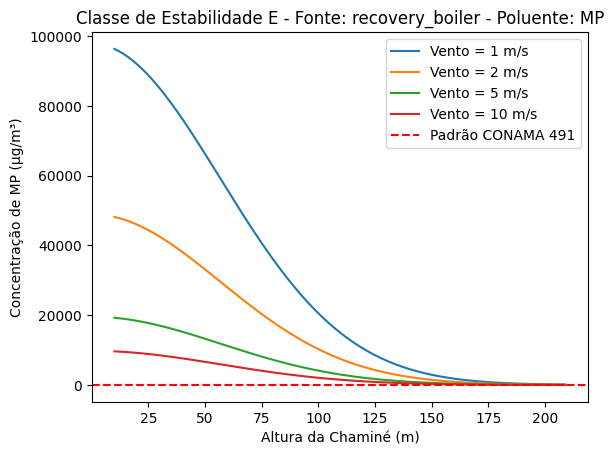

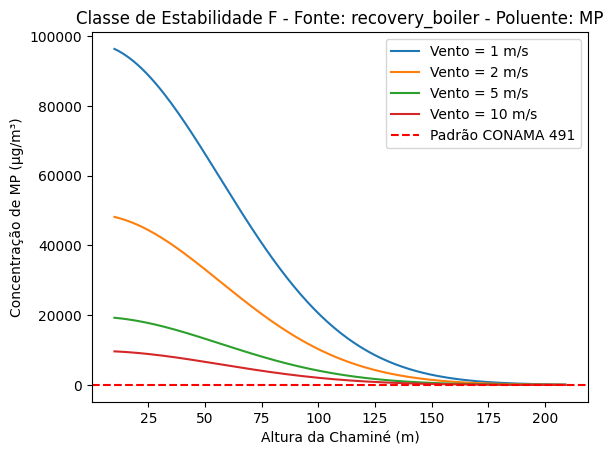

Fonte: smelt_tank, Poluente: MP


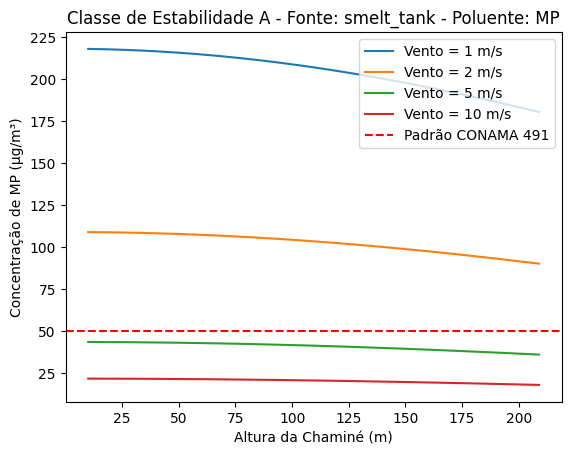

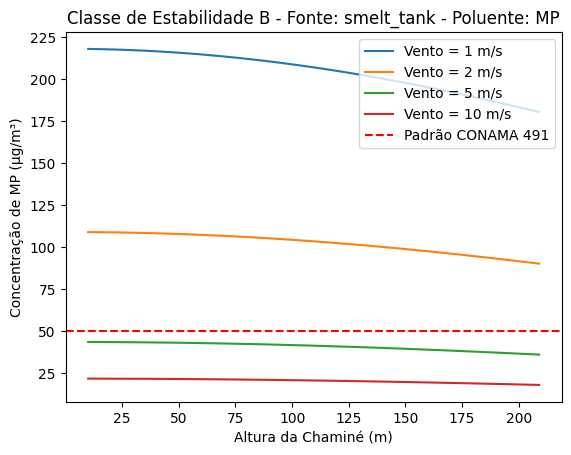

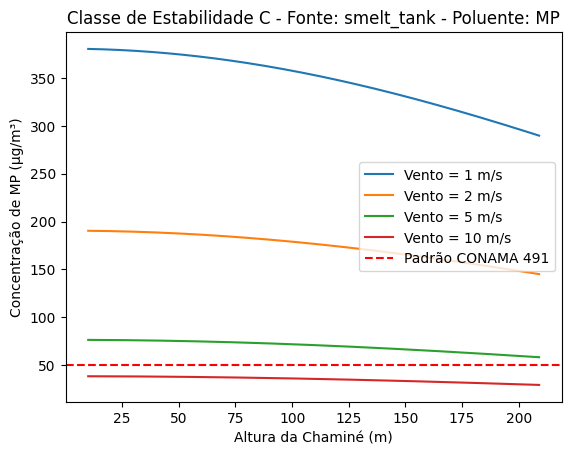

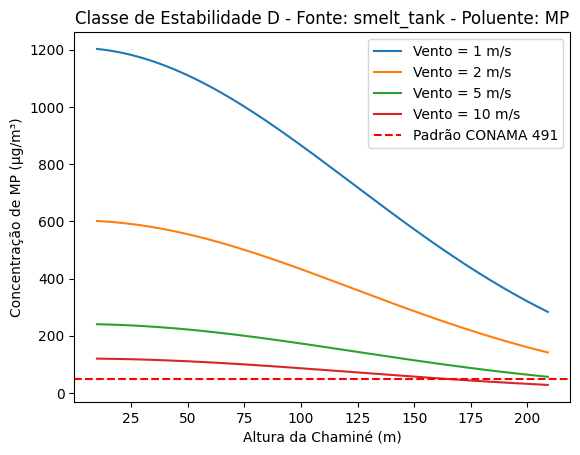

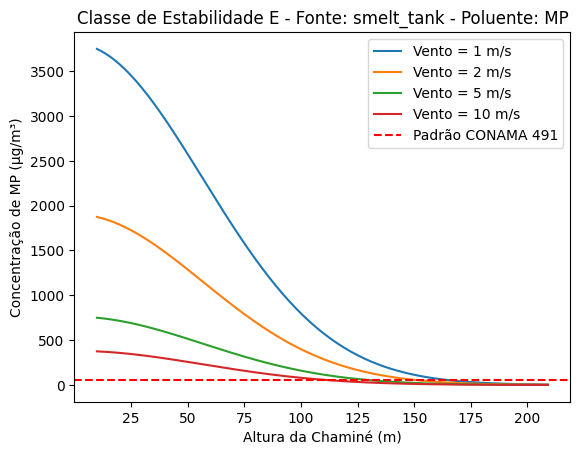

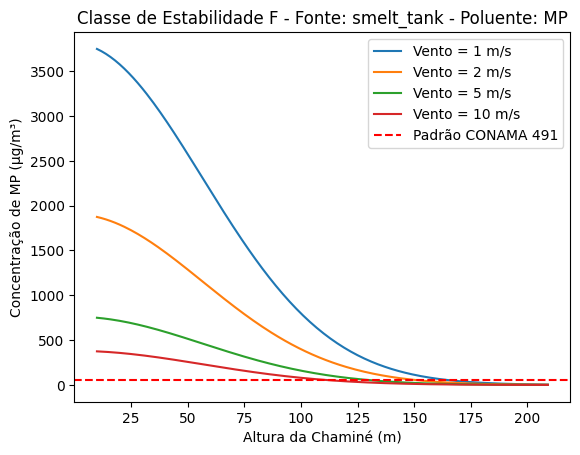

Fonte: lime_kiln, Poluente: MP


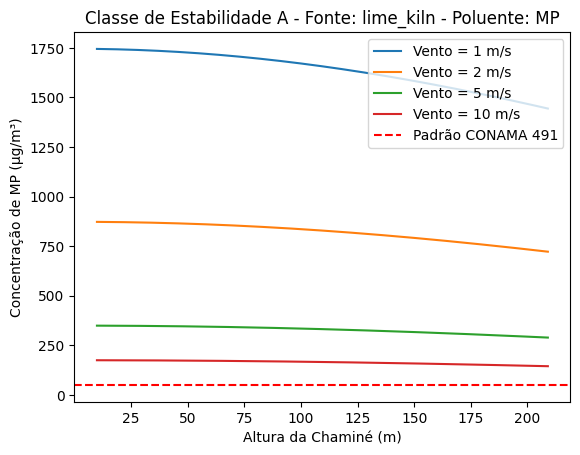

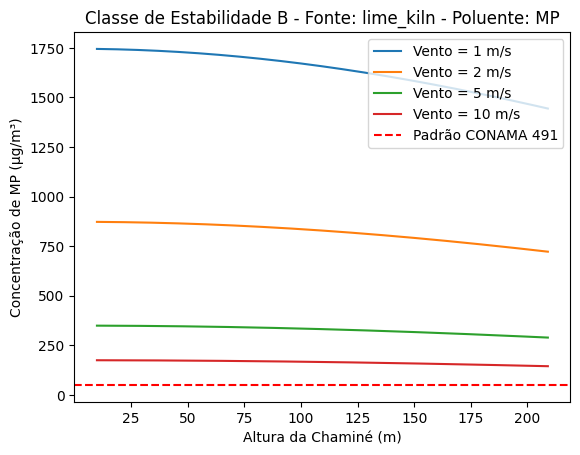

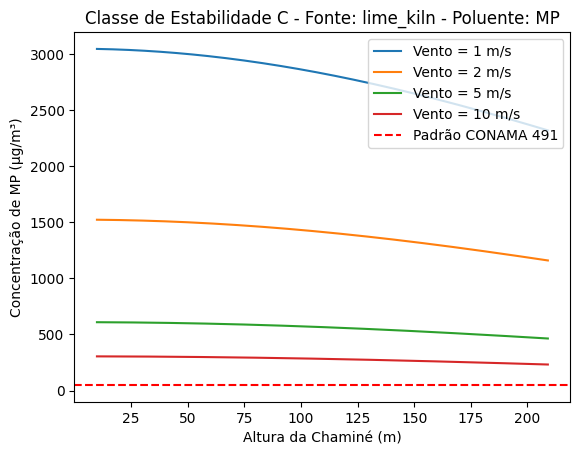

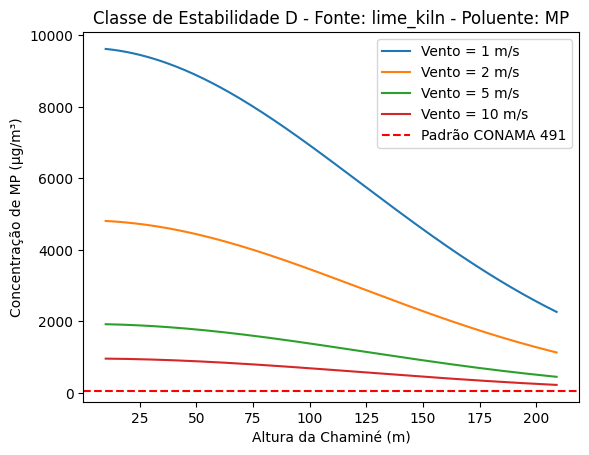

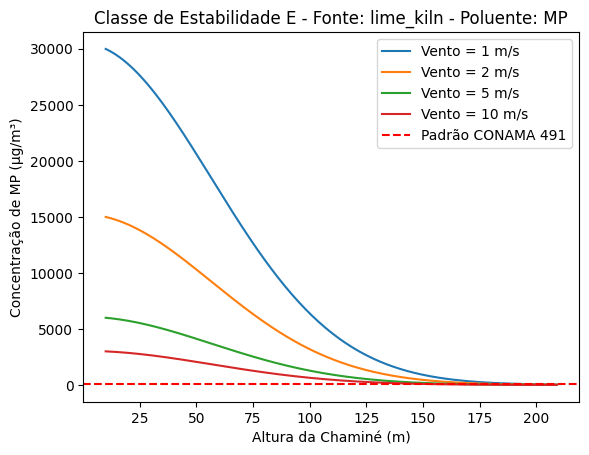

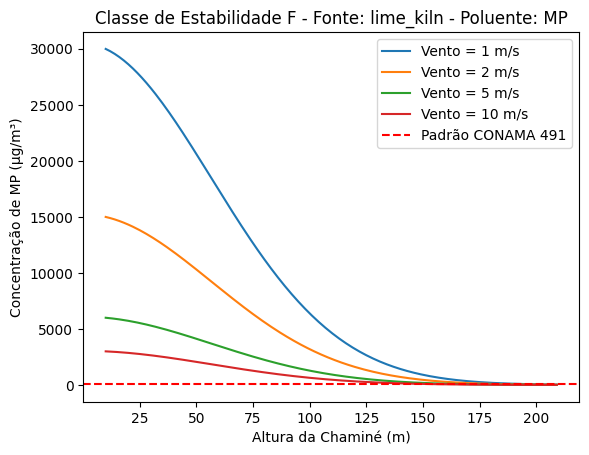

Fonte: recovery_boiler, Poluente: SO2


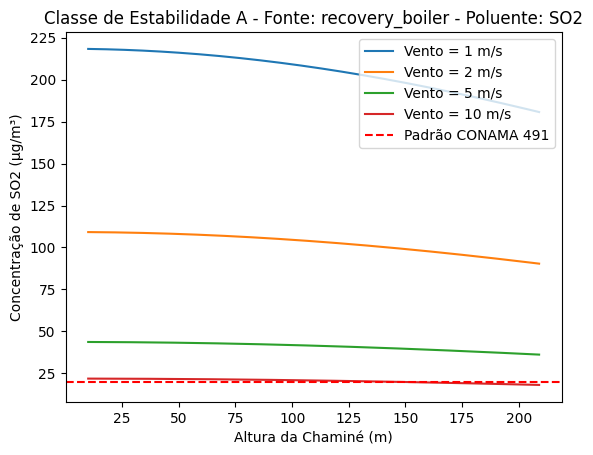

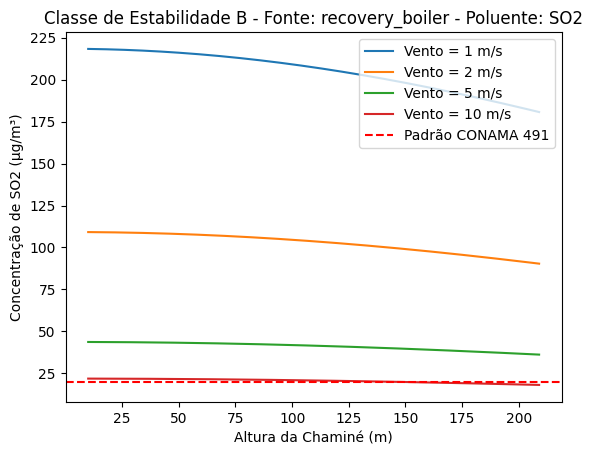

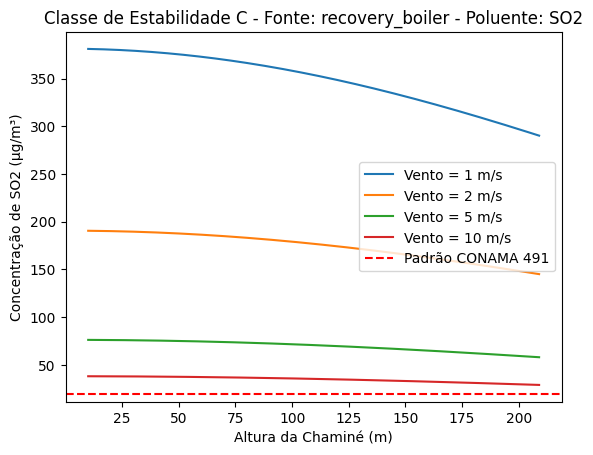

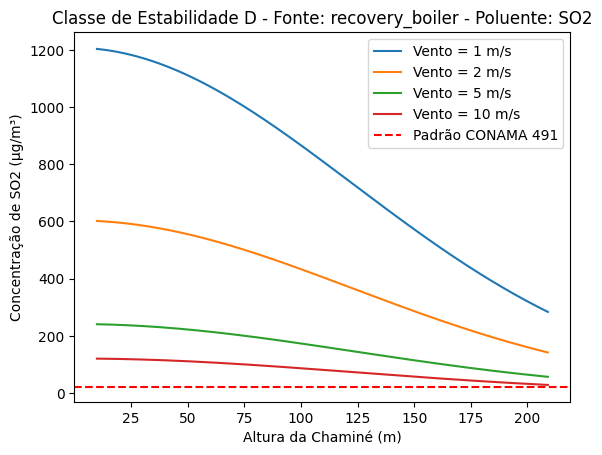

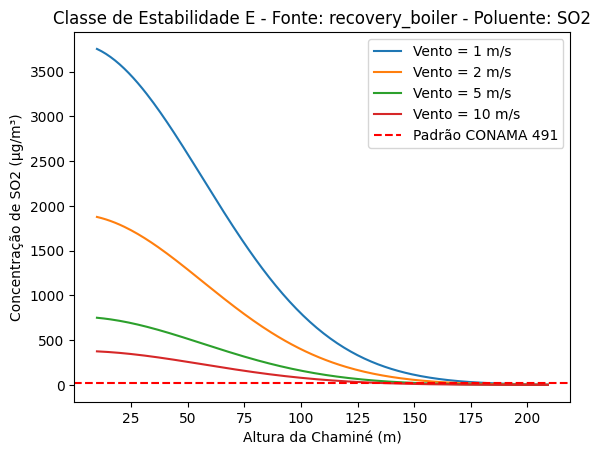

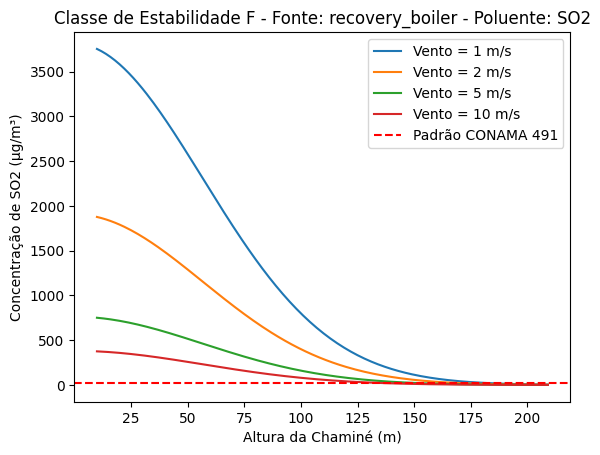

Fonte: smelt_tank, Poluente: SO2


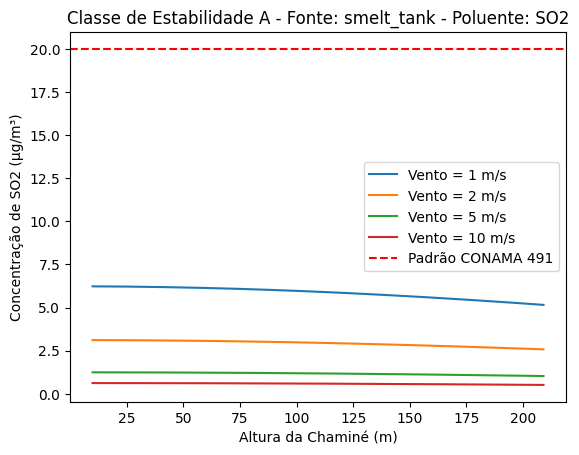

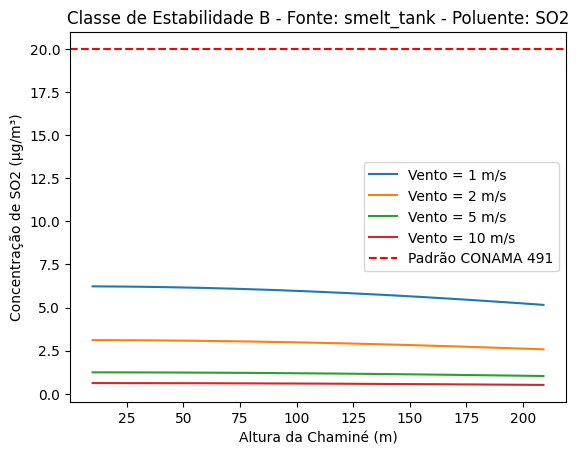

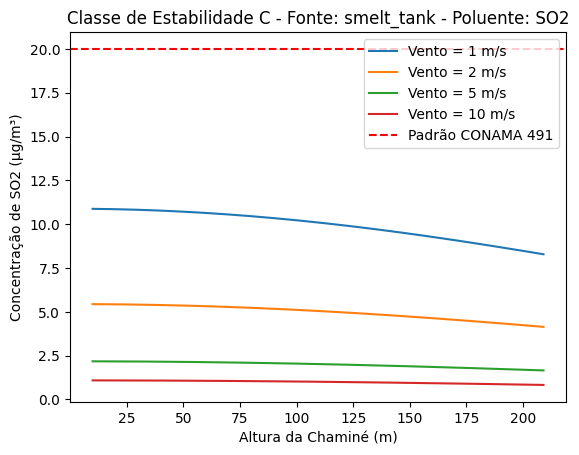

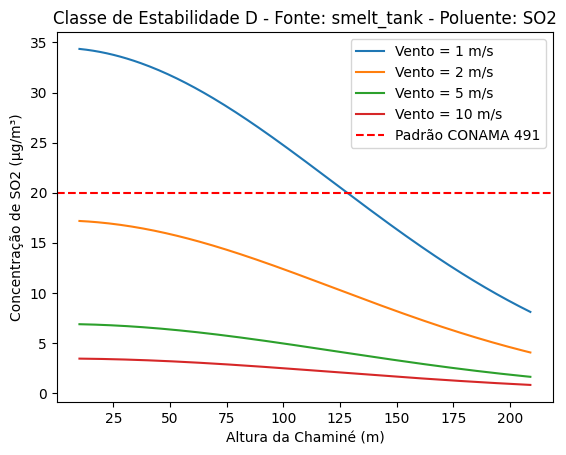

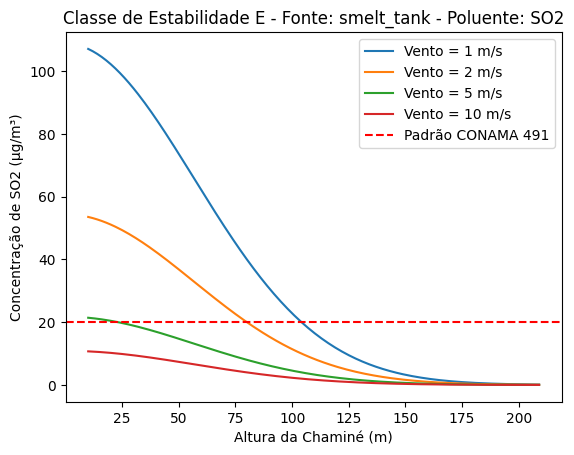

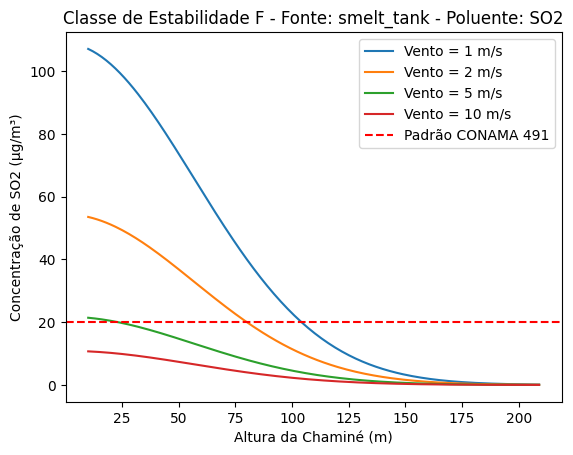

Fonte: lime_kiln, Poluente: SO2


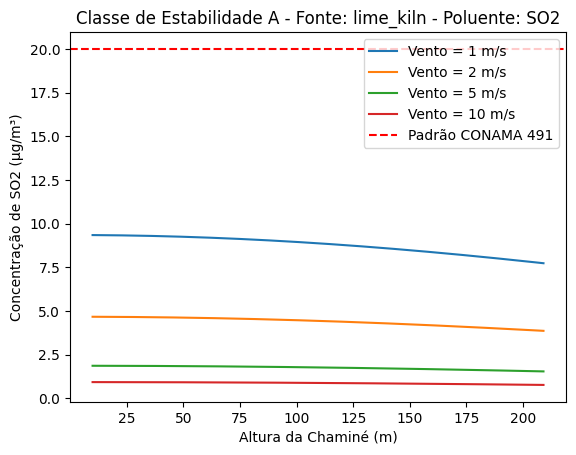

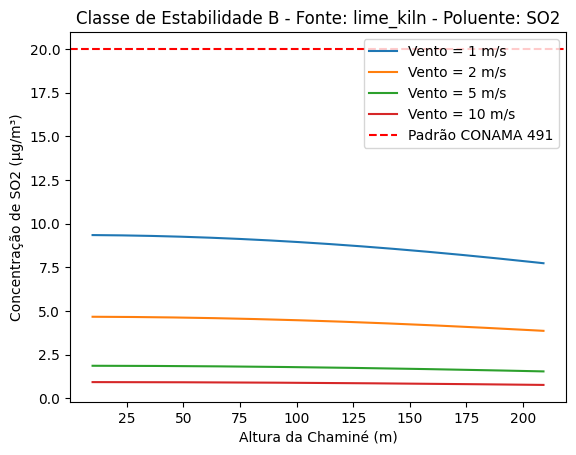

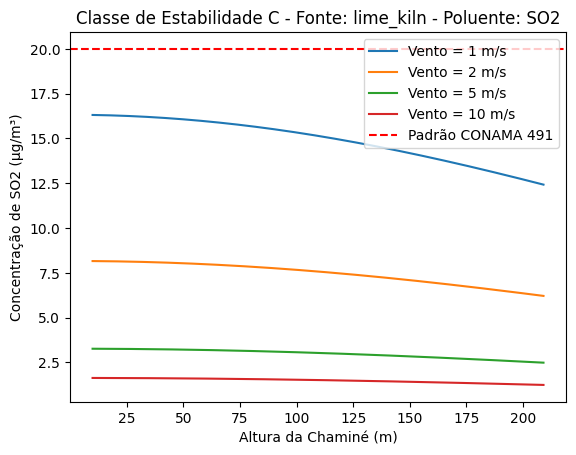

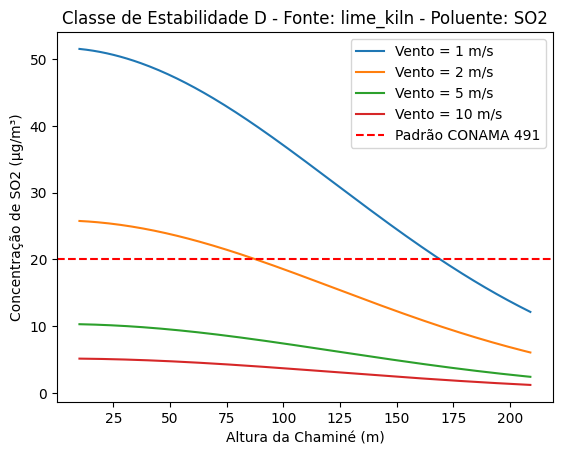

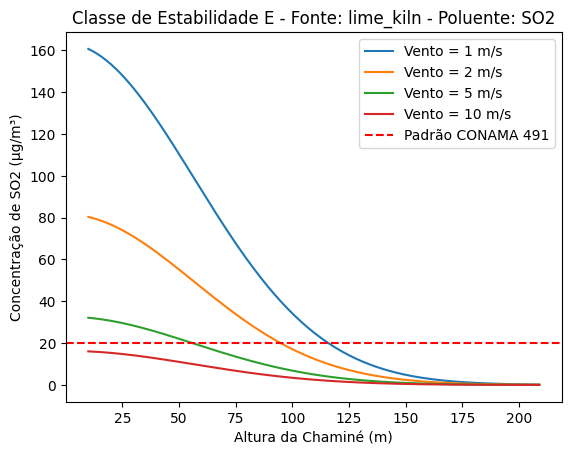

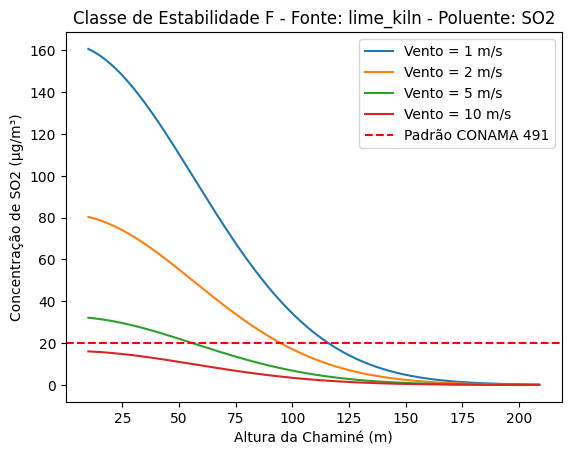

KeyError: 'CO'

In [13]:
import numpy as np
import matplotlib.pyplot as plt

sigmaY,sigmaZ = sigmaXY(xx,classe,urbOrRural)
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,yy,z,H)
# Parâmetros da simulação
emissoes = {
    'recovery_boiler': {
        'MP': 1617.995,  # g/s
        'SO2': 62.992   # g/s
        
    },
    'smelt_tank': {
        'MP': 62.922,    # g/s
        'SO2': 1.798    # g/s
        
    },
    'lime_kiln': {
        'MP': 503.376,   # g/s
        'SO2': 2.697    # g/s
        
    }
}

velocidades_vento = [1, 2, 5, 10]  # Diferentes velocidades do vento (m/s)
alturas_chamine = np.arange(10, 210)  # Alturas da chaminé (m)
classes_estabilidade = ['A', 'B', 'C', 'D', 'E', 'F']  # Classes de estabilidade
area_tipo = 'urbano'  # Tipo de área (urbano ou rural)

# Padrões da Resolução CONAMA 491 para poluentes (µg/m³)
padrao_conama_mp = 50   # Para Material Particulado (MP10)
padrao_conama_so2 = 20  # Para Dióxido de Enxofre (SO2)


# Ponto de interesse para avaliação (x, y, z)
x = 1000  # Distância na direção do vento (m)
y = 0     # Posição lateral (m)
z = 1.5   # Altura de respiração (m)

# Realizar simulações e plotar resultados
for poluente in ['MP', 'SO2', 'CO']:
    for fonte in emissoes:
        Q = emissoes[fonte][poluente]  # Taxa de emissão para a fonte e poluente
        padrao_conama = padrao_conama_mp if poluente == 'MP' else (padrao_conama_so2 if poluente == 'SO2' else padrao_conama_co)
        print(f"Fonte: {fonte}, Poluente: {poluente}")
        for estabilidade in classes_estabilidade:
            fig, ax = plt.subplots()
            for u in velocidades_vento:
                concentracoes = []
                for H in alturas_chamine:
                    sigmaY, sigmaZ = sigmaXY(x, estabilidade, area_tipo)  # Corrigido para usar 'estabilidade' e 'area_tipo'
                    conc = modeloGaussiano(Q, sigmaY, sigmaZ, u, y, z, H)
                    concentracoes.append(conc)
                ax.plot(alturas_chamine, concentracoes, label=f'Vento = {u} m/s')

            ax.axhline(padrao_conama, color='r', linestyle='--', label='Padrão CONAMA 491')
            ax.set_xlabel('Altura da Chaminé (m)')
            ax.set_ylabel(f'Concentração de {poluente} (µg/m³)')
            ax.set_title(f'Classe de Estabilidade {estabilidade} - Fonte: {fonte} - Poluente: {poluente}')
            ax.legend()
            plt.show()


### Impacto das Condições Atmosféricas na Altura da Chaminé

1. **Estabilidade Atmosférica:**
   
   A estabilidade atmosférica desempenha um papel crucial na dispersão dos poluentes emitidos pela chaminé. Durante o dia, a estabilidade pode variar de alta (classes 'A' e 'B') a baixa (classes 'C' a 'F'), afetando diretamente a altura mínima necessária. Em condições estáveis ('A' e 'B'), onde há menor mistura vertical e dispersão mais limitada, as alturas mínimas da chaminé tendem a ser menores. Por outro lado, em condições instáveis ('C' a 'F'), onde a turbulência permite maior mistura e dispersão, as alturas mínimas exigidas são geralmente maiores para garantir que os poluentes não se acumulem em níveis prejudiciais à saúde.

2. **Influência da Velocidade do Vento:**
   
   A velocidade do vento influencia diretamente a dispersão horizontal e vertical dos poluentes. Ventos mais fracos favorecem a formação de pluma mais concentrada próxima à fonte emissora, exigindo alturas maiores para elevar a pluma acima da camada limite atmosférica e dispersá-la adequadamente. Em contraste, ventos mais fortes facilitam uma dispersão mais eficiente, reduzindo a necessidade de alturas extremamente elevadas da chaminé.

3. **Cobertura de Nuvens e Radiação Solar:**
   
   Durante o dia, a cobertura de nuvens e a radiação solar impactam a altura mínima da chaminé ao influenciar a estabilidade atmosférica. Sob condições de alta insolação e céu claro, a radiação solar aquece o solo, promovendo uma maior turbulência e mistura atmosférica, o que pode reduzir a altura mínima necessária. Em contrapartida, céus nublados ou condições de baixa radiação solar tendem a resultar em estabilidade atmosférica mais alta e, portanto, exigem alturas maiores da chaminé para garantir a dispersão adequada.

4. **Variações Diurnas e Noturnas:**
   
   As variações diurnas e noturnas das condições atmosféricas também desempenham um papel significativo. Durante a noite, a estabilidade atmosférica geralmente aumenta devido à ausência de radiação solar direta, exigindo alturas maiores da chaminé para superar a camada limite noturna mais estável e dispersar a pluma de poluentes. A cobertura de nuvens durante a noite também pode agravar a estabilidade atmosférica, aumentando ainda mais a altura mínima necessária.

### Considerações Finais

A escolha adequada da altura da chaminé não só visa cumprir os regulamentos ambientais, mas também é crucial para mitigar os impactos adversos à saúde humana e ao meio ambiente. Ao projetar e operar instalações industriais, é essencial considerar cuidadosamente as condições atmosféricas locais, realizar simulações detalhadas e, quando necessário, ajustar as alturas das chaminés para garantir a conformidade contínua com os padrões ambientais. A monitorização contínua das emissões e da qualidade do ar é fundamental para avaliar o desempenho das medidas de controle e efetuar ajustes conforme necessário.